In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [51]:
x_train, x_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

In [52]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
            feature_names=iris.feature_names, impurity=True,filled=True)

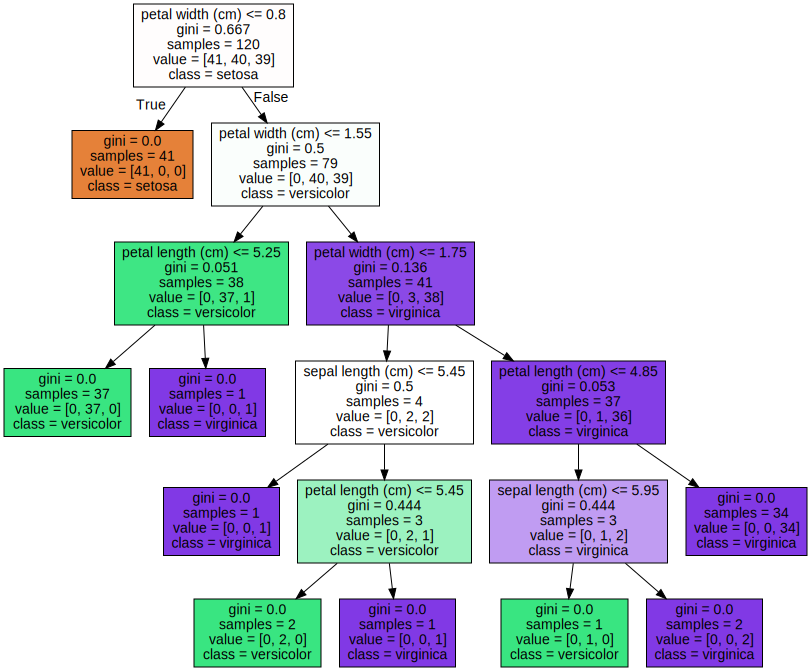

In [27]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [13]:
x_train, x_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=11)
# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

In [14]:
export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
            feature_names=iris.feature_names, impurity=True,filled=True)

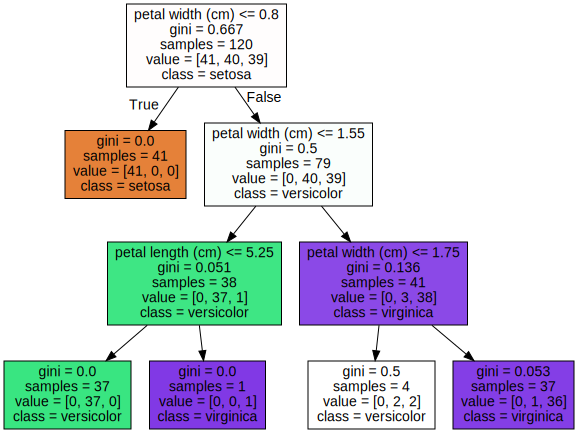

In [15]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

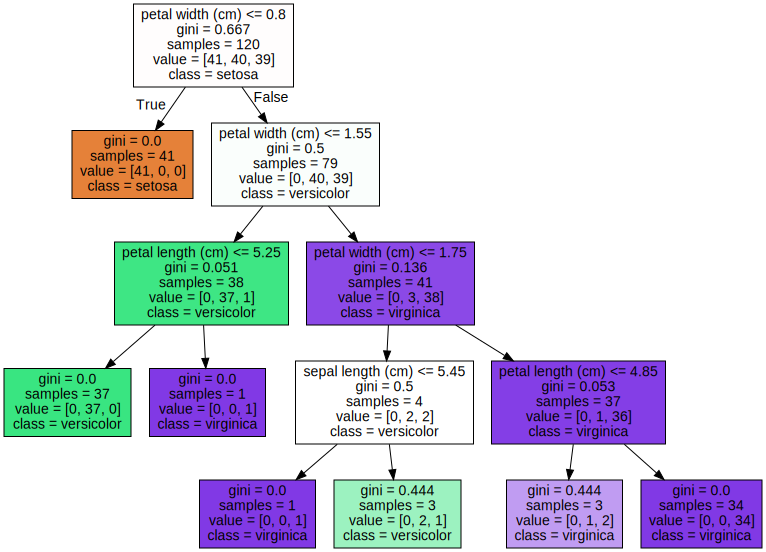

In [48]:
x_train, x_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(min_samples_split=4,random_state=11)
# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
            feature_names=iris.feature_names, impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

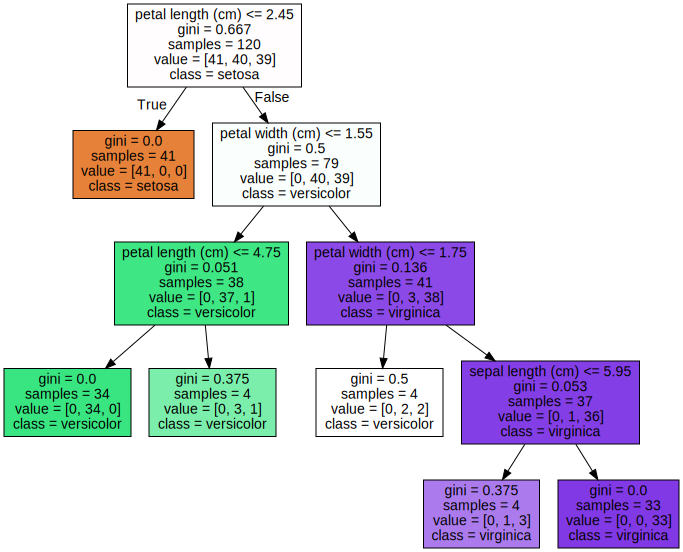

In [56]:
x_train, x_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf=4,random_state=156)
# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
            feature_names=iris.feature_names, impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importance: 
[0.006 0.    0.546 0.448]
sepal length (cm) :0.006
sepal width (cm) :0.000
petal length (cm) :0.546
petal width (cm) :0.448


<AxesSubplot: >

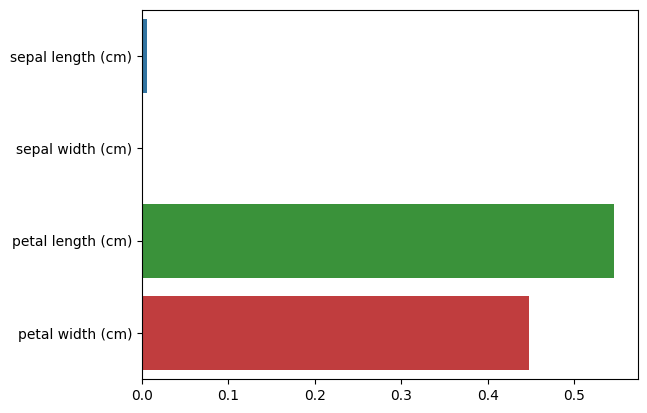

In [57]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importance: \n{0}'.format(np.round(dt_clf.feature_importances_,3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} :{1:.3f}'.format(name,value))

sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

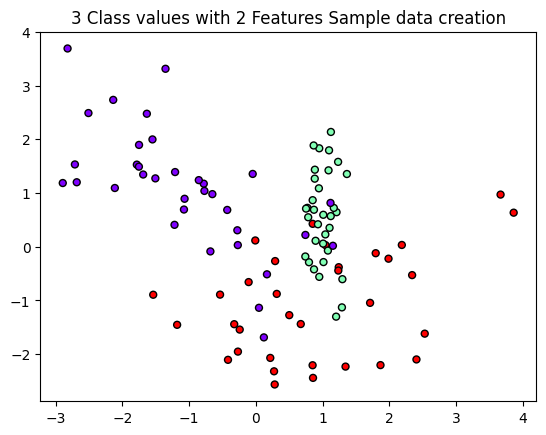

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1,random_state=0)

plt.scatter(x_features[:,0],x_features[:,1],marker='o',c=y_labels, s=25,cmap='rainbow',edgecolor='k')

In [4]:
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\seon\AppData\Local\Temp\ipykernel_13072\2541824262.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


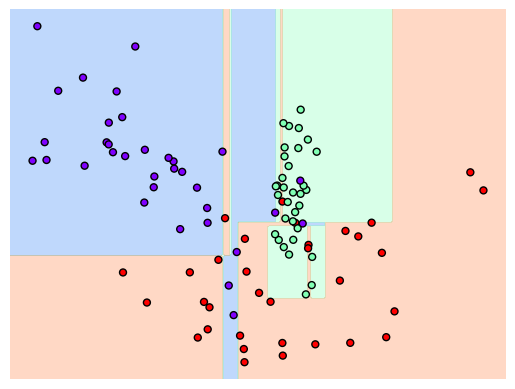

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

C:\Users\seon\AppData\Local\Temp\ipykernel_13072\2541824262.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


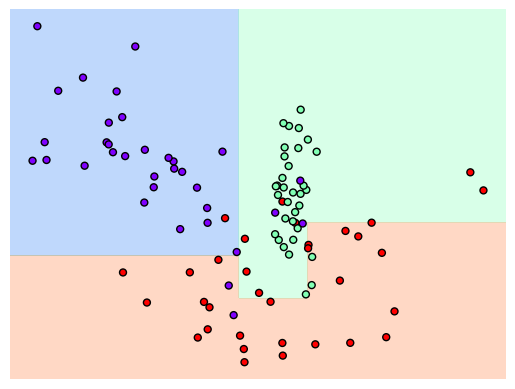

In [8]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [12]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()


column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [62]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+
                        '-'+str(x[1]) if x[1]>0 else x[0],axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [31]:
df = pd.DataFrame([['a'],['a'],['a'],['b'],['b'],['a']],columns=['A'])

In [32]:
df

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [33]:
df.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [42]:
old_feature_name_df = pd.DataFrame([['a'],['a'],['a'],['b'],['b'],['a']],columns=['column_name'])

feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])

feature_dup_df

,dup_cnt
0,0
1,1
2,2
3,0
4,1
5,3


In [43]:
feature_dup_df = feature_dup_df.reset_index()
feature_dup_df

,index,dup_cnt
0,0,0
1,1,1
2,2,2
3,3,0
4,4,1
5,5,3


In [44]:
old_feature_name_df.reset_index()

,index,column_name
0,0,a
1,1,a
2,2,a
3,3,b
4,4,b
5,5,a


In [45]:
new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
new_feature_name_df

,index,column_name,dup_cnt
0,0,a,0
1,1,a,1
2,2,a,2
3,3,b,0
4,4,b,1
5,5,a,3


In [46]:
new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+
                        '-'+str(x[1]) if x[1]>0 else x[0],axis=1)
new_feature_name_df

,index,column_name,dup_cnt
0,0,a,0
1,1,a-1,1
2,2,a-2,2
3,3,b,0
4,4,b-1,1
5,5,a-3,3


In [50]:
feature_name = new_feature_name_df.iloc[:,1].values.tolist()
feature_name

['a', 'a-1', 'a-2', 'b', 'b-1', 'a-3']

In [64]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',header=None,names=['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    x_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    x_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+', header=None, names=['action'])

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_human_dataset()
    

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train,y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터 :\n',dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [66]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(x_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [67]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [68]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(x_train,y_train)
    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_dept = {0} 정확도: {1:.4f}'.format(depth,accuracy))

max_dept = 6 정확도: 0.8558
max_dept = 8 정확도: 0.8707
max_dept = 10 정확도: 0.8673
max_dept = 12 정확도: 0.8646
max_dept = 16 정확도: 0.8575
max_dept = 20 정확도: 0.8548
max_dept = 24 정확도: 0.8548


In [70]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8575


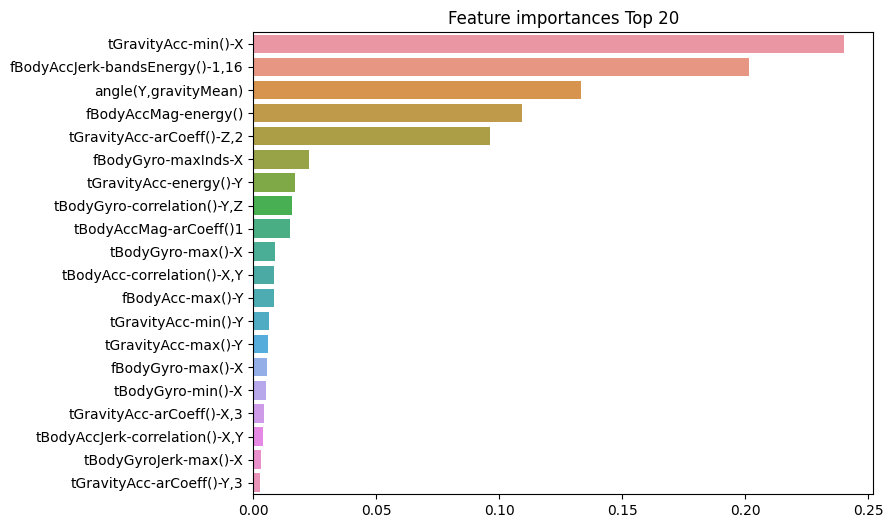

In [72]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()